In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

In [2]:
songs = pd.read_csv('data/df_audio_features_1000.csv')

In [3]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1387 non-null   object 
 1   artist            1387 non-null   object 
 2   danceability      1387 non-null   float64
 3   energy            1387 non-null   float64
 4   key               1387 non-null   int64  
 5   loudness          1387 non-null   float64
 6   mode              1387 non-null   int64  
 7   speechiness       1387 non-null   float64
 8   acousticness      1387 non-null   float64
 9   instrumentalness  1387 non-null   float64
 10  liveness          1387 non-null   float64
 11  valence           1387 non-null   float64
 12  tempo             1387 non-null   float64
 13  duration_ms       1387 non-null   int64  
 14  time_signature    1387 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 162.7+ KB


In [5]:
songs.set_index(['name','artist'], inplace = True)

In [7]:
minmax = MinMaxScaler(feature_range=(0,1))

In [42]:
songs_scaled = minmax.fit_transform(songs)

In [43]:
songs_scaled = pd.DataFrame(songs_scaled, columns = songs.columns, index = songs.index)

In [45]:
songs_scaled.shape

(1387, 13)

Text(0.5, 1.0, 'Data with MinMaxScaler')

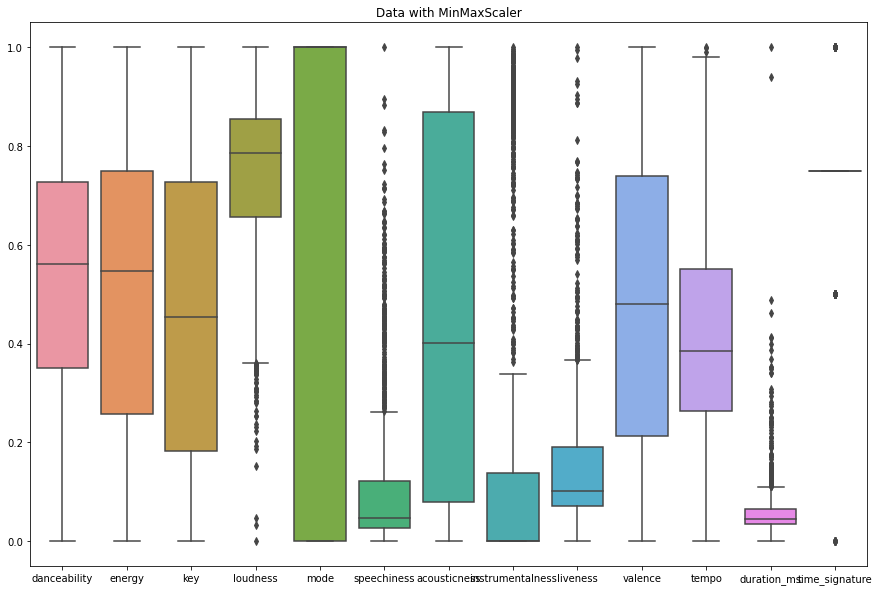

In [44]:
plt.subplots(figsize=(15, 10))
sns.boxplot(data=songs_scaled.loc[:, songs.columns]).set_title('Data with MinMaxScaler')

In [21]:
maxabs = MaxAbsScaler()

In [22]:
songs_scaled = maxabs.fit_transform(songs)

In [23]:
songs_scaled = pd.DataFrame(songs_scaled, columns = songs.columns, index = songs.index)

Text(0.5, 1.0, 'Data with MaxAbsScaler')

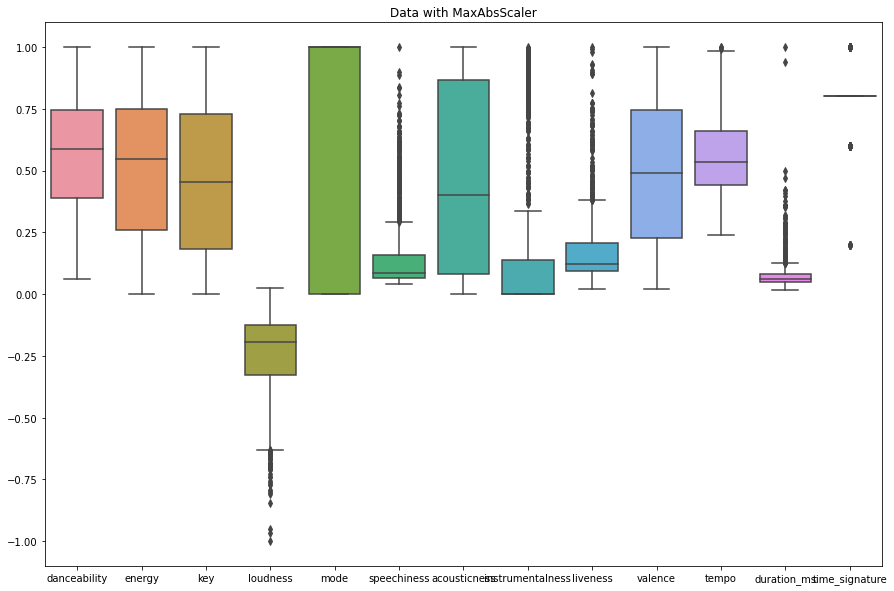

In [24]:
plt.subplots(figsize=(15, 10))
sns.boxplot(data=songs_scaled.loc[:, songs.columns]).set_title('Data with MaxAbsScaler')

In [27]:

maxabs = RobustScaler()

In [28]:
songs_scaled = maxabs.fit_transform(songs)

In [29]:
songs_scaled = pd.DataFrame(songs_scaled, columns = songs.columns, index = songs.index)

Text(0.5, 1.0, 'Data with RobustScaler')

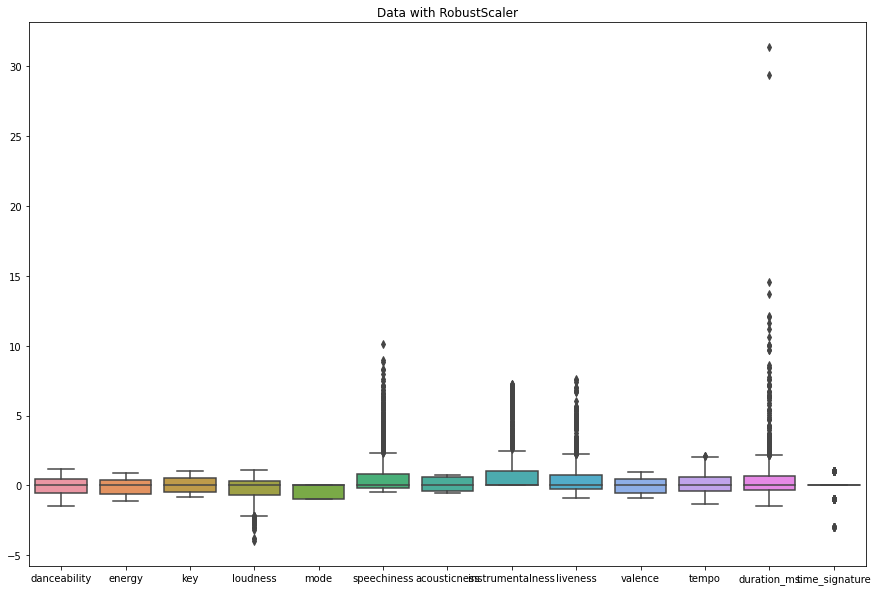

In [30]:
plt.subplots(figsize=(15, 10))
sns.boxplot(data=songs_scaled.loc[:, songs.columns]).set_title('Data with RobustScaler')

In [32]:

maxabs = QuantileTransformer()

In [33]:
songs_scaled = maxabs.fit_transform(songs)

In [34]:
songs_scaled = pd.DataFrame(songs_scaled, columns = songs.columns, index = songs.index)

In [41]:
songs_scaled.shape

(1387, 14)

Text(0.5, 1.0, 'Data with QuantileTransformer')

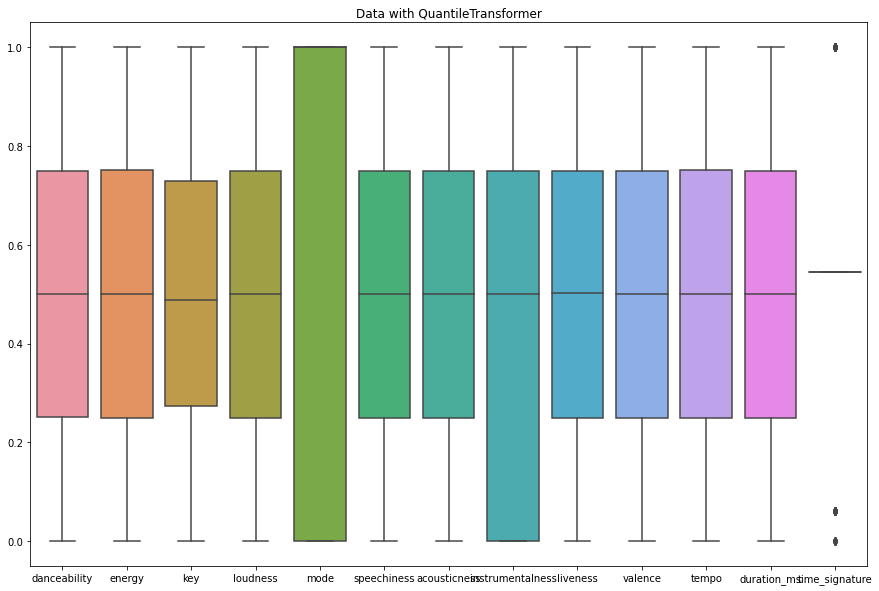

In [35]:
plt.subplots(figsize=(15, 10))
sns.boxplot(data=songs_scaled.loc[:, songs.columns]).set_title('Data with QuantileTransformer')

In [36]:
from sklearn.cluster import KMeans

In [46]:
songs_kmeans = KMeans(n_clusters=5)
songs_kmeans.fit(songs_scaled)
songs_scaled['cluster'] = songs_kmeans.labels_

In [47]:
songs_scaled

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Don't Be Cruel,Elvis Presley,0.704777,0.552200,0.181818,0.723440,1.0,0.281838,0.859437,0.000035,0.072592,0.853947,0.224187,0.016023,0.75,1
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.580938,0.247977,0.090909,0.698907,1.0,0.030391,0.453814,0.000009,0.089495,0.591879,0.494567,0.042899,0.75,1
Smoke Gets In Your Eyes,The Platters,0.254755,0.227896,0.272727,0.689059,1.0,0.014291,0.947791,0.000081,0.618376,0.211726,0.412383,0.025189,0.75,1
"What'd I Say, Pt. 1 & 2",Ray Charles,0.531181,0.683728,0.363636,0.856565,1.0,0.049928,0.811245,0.000000,0.146531,0.802155,0.247063,0.065093,0.75,1
Dream A Little Dream Of Me,Ella Fitzgerald,0.437196,0.167654,0.000000,0.676903,1.0,0.091715,0.921687,0.000000,0.157938,0.398177,0.168742,0.032589,0.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.157452,0.069660,0.272727,0.461981,1.0,0.043596,0.920683,0.725888,0.064814,0.047545,0.244005,0.248397,0.75,3
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.141973,0.101387,0.545455,0.495329,1.0,0.037988,0.858433,0.432487,0.050503,0.016470,0.213537,0.211094,0.75,3
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.000000,0.000913,0.818182,0.031808,1.0,0.036541,0.954819,0.983756,0.058592,0.015330,0.139723,0.046743,0.50,3
